In [421]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# ROOT.gStyle.SetOptStat(000000)

In [422]:
# ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')

In [423]:
# Consider some distribution between 0 to a 100

minval = 0
maxval = 100

coarsebins = 10
finebins   = 20

# Construct response matrices
Nominal_16  = ROOT.TH2D("Nominal_16", "Nominal_16", coarsebins, minval, maxval, finebins, minval,maxval)
JES_UP_16   = Nominal_16.Clone("JES_UP_16")
JES_DOWN_16 = Nominal_16.Clone("JES_DOWN_16")

Nominal_17  = ROOT.TH2D("Nominal_17", "Nominal_17", coarsebins, minval, maxval, finebins, minval,maxval)
JES_UP_17   = Nominal_17.Clone("JES_UP_17")
JES_DOWN_17 = Nominal_17.Clone("JES_DOWN_17")

Nominal_16.SetTitle("Nominal 16")
JES_UP_16.SetTitle("JES 16 +1#sigma")
JES_DOWN_16.SetTitle("JES 16 -1#sigma")

Nominal_17.SetTitle("Nominal 17")
JES_UP_17.SetTitle("JES 17 +1#sigma")
JES_DOWN_17.SetTitle("JES 17 -1#sigma")

# Assume a resolution of 1.0 units
resolution = 1.0

scaleup_16 = 1.01
scaledn_16 = 0.99

scaleup_17 = 1.01
scaledn_17 = 0.99

Npe  = 10000
vals = np.linspace(minval, maxval, maxval+1)

# Get Nominal values from a gaussian centered at each bin with the experimental resolution
xvals_16 = np.random.normal(loc=vals    , scale=resolution, size=(Npe,vals.size))
yvals_16 = np.random.normal(loc=xvals_16, scale=resolution)

xvals_17 = np.random.normal(loc=vals    , scale=resolution, size=(Npe,vals.size))
yvals_17 = np.random.normal(loc=xvals_17, scale=resolution)
#yvals_17 = np.random.normal(loc=xvals_16, scale=resolution)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Nominal_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Nominal_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Nominal_17 (Potential memory leak).


In [424]:
# Next scale the reco up and down
y_up_vals_16 = yvals_16 * scaleup_16
y_dn_vals_16 = yvals_16 * scaledn_16

y_up_vals_17 = yvals_17 * scaleup_17
y_dn_vals_17 = yvals_17 * scaledn_17

for i in np.arange(len(xvals_16)):    
    for j in np.arange(len(yvals_16[i])):
        
        x_16  = xvals_16[i][j]
        y_16  = yvals_16[i][j]
                            
        y_up_16 = y_up_vals_16[i][j]
        y_dn_16 = y_dn_vals_16[i][j]

        JES_UP_16.Fill(x_16, y_up_16)
        Nominal_16.Fill(x_16,   y_16)
        JES_DOWN_16.Fill(x_16, y_dn_16)
        
#         JES_UP_16.Fill(x_16, y_up_16, 1./Npe)
#         Nominal_16.Fill(x_16,   y_16, 1./Npe)
#         JES_DOWN_16.Fill(x_16, y_dn_16, 1./Npe)
        

for i in np.arange(len(xvals_17)):    
    for j in np.arange(len(yvals_17[i])):
        
        x_17  = xvals_17[i][j]
        y_17  = yvals_17[i][j]

        y_up_17 = y_up_vals_17[i][j]
        y_dn_17 = y_dn_vals_17[i][j]

        JES_UP_17.Fill(x_17, y_up_17)
        Nominal_17.Fill(x_17,   y_17)
        JES_DOWN_17.Fill(x_17, y_dn_17)
        
#         JES_UP_17.Fill(x_17, y_up_17, 1./Npe)
#         Nominal_17.Fill(x_17,   y_17, 1./Npe)
#         JES_DOWN_17.Fill(x_17, y_dn_17, 1./Npe)

In [425]:
%jsroot on

In [426]:
c0 = ROOT.TCanvas("c0", "c0", 800, 700)
c0.Divide(3,2)
c0.cd(1)
Nominal_16.Draw("colz")

c0.cd(2)
JES_UP_16.Draw("colz")

c0.cd(3)
JES_DOWN_16.Draw("colz")

c0.cd(4)
Nominal_17.Draw("colz")

c0.cd(5)
JES_UP_17.Draw("colz")

c0.cd(6)
JES_DOWN_17.Draw("colz")
c0.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c0


In [427]:
JES_UP_16_ratio = JES_UP_16.Clone()
JES_UP_16_ratio.Divide(Nominal_16)

JES_DOWN_16_ratio = JES_DOWN_16.Clone()
JES_DOWN_16_ratio.Divide(Nominal_16)

JES_UP_17_ratio = JES_UP_17.Clone()
JES_UP_17_ratio.Divide(Nominal_17)

JES_DOWN_17_ratio = JES_DOWN_17.Clone()
JES_DOWN_17_ratio.Divide(Nominal_17)

cratio = ROOT.TCanvas("cratio", "cratio", 800, 700)
cratio.Divide(3,2)

cratio.cd(1)
Nominal_16.Draw("colz")

cratio.cd(2)
JES_UP_16_ratio.Draw("colz")
ROOT.gPad.SetLogz()

cratio.cd(3)
JES_DOWN_16_ratio.Draw("colz")
ROOT.gPad.SetLogz()

cratio.cd(4)
Nominal_17.Draw("colz")

cratio.cd(5)
JES_UP_17_ratio.Draw("colz")
ROOT.gPad.SetLogz()

cratio.cd(6)
JES_DOWN_17_ratio.Draw("colz")
ROOT.gPad.SetLogz()
cratio.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cratio


In [428]:
True_vals_16 = np.random.normal(loc=(maxval-minval)/2,scale=30, size=1000000)
True_mids_16 = np.random.normal(loc=True_vals_16     ,scale=resolution)

True_vals_17 = np.random.normal(loc=(maxval-minval)/2,scale=30, size=1000000)
True_mids_17 = np.random.normal(loc=True_vals_17     ,scale=resolution)

reco_16   = ROOT.TH1D("reco_16"  , "reco_16", finebins, minval, maxval)
sys_up_16 = ROOT.TH1D("sys_up_16", "sys_up_16", finebins, minval, maxval)
sys_dn_16 = ROOT.TH1D("sys_dn_16", "sys_dn_16", finebins, minval, maxval)

sys_up_16.SetLineStyle(2)
sys_dn_16.SetLineStyle(3)

reco_17   = ROOT.TH1D("reco_17"  , "reco_17", finebins, minval, maxval)
sys_up_17 = ROOT.TH1D("sys_up_17", "sys_up_17", finebins, minval, maxval)
sys_dn_17 = ROOT.TH1D("sys_dn_17", "sys_dn_17", finebins, minval, maxval)

sys_up_17.SetLineStyle(2)
sys_dn_17.SetLineStyle(3)

gen_16 = ROOT.TH1D("gen_16", "gen_16", finebins, minval, maxval)
gen_17 = ROOT.TH1D("gen_17", "gen_17", finebins, minval, maxval)

# Fill reco-level histograms 
for x in True_mids_16:
    reco_16.Fill(x)
#     sys_up_16.Fill(x * scaleup_16)
#     sys_dn_16.Fill(x * scaledn_16)

sys_up_16 = reco_16.Clone("sys_up_16")
sys_up_16.Scale(scaleup_16)

sys_dn_16 = reco_16.Clone("sys_dn_16")
sys_dn_16.Scale(scaledn_16)

for x in True_mids_17:
    reco_17.Fill(x)
#     sys_up_17.Fill(x * scaleup_17)
#     sys_dn_17.Fill(x * scaledn_17)

sys_up_17 = reco_17.Clone("sys_up_17")
sys_up_17.Scale(scaleup_16)

sys_dn_17 = reco_17.Clone("sys_dn_17")
sys_dn_17.Scale(scaledn_17)

# Fill gen-level histograms
for t in True_vals_16:
    gen_16.Fill(t)
        
for t in True_vals_17:
    gen_17.Fill(t)

# reco_16   = Nominal_16.ProjectionY()
# sys_up_16 = JES_UP_16.ProjectionY()
# sys_dn_16 = JES_DOWN_16.ProjectionY()

# gen_16    = Nominal_17.ProjectionX()

# sys_up_16.SetLineStyle(2)
# sys_dn_16.SetLineStyle(3)

# reco_17   = Nominal_17.ProjectionY()
# sys_up_17 = JES_UP_17.ProjectionY()
# sys_dn_17 = JES_DOWN_17.ProjectionY()

# gen_17    = Nominal_17.ProjectionX()

# sys_up_17.SetLineStyle(2)
# sys_dn_17.SetLineStyle(3)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: reco_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: reco_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: sys_up_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: sys_dn_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: reco_17 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: sys_up_17 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: sys_dn_17 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: gen_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: gen_16 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: gen_17 (Potential memory leak).


In [429]:
True_mids_16 * 1.05

array([16.19027456, 71.20639042, 78.07842499, ..., 31.21457862,
       83.26849939, 96.14295024])

In [430]:
creco = ROOT.TCanvas("creco", "creco", 600, 800)

creco.Divide(1,2)

creco.cd(1)
reco_16.Draw('e')
sys_up_16.Draw("hist same")
sys_dn_16.Draw("hist same")

gen_16.SetLineColor(2)
gen_16.Draw("e same")
# creco.Draw()

reco_16.SetMarkerStyle(20)
gen_16.SetMarkerStyle(21)

reco_16.SetMarkerColor(ROOT.kBlue)
gen_16.SetMarkerColor(ROOT.kRed)

reco_16.SetLineColor(ROOT.kBlue)
gen_16.SetLineColor(ROOT.kRed)

leg1 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg1.SetBorderSize(0)
leg1.SetFillColor(0)
leg1.AddEntry( reco_16  , 'Reco 16', 'p')
leg1.AddEntry( sys_up_16, 'JES 16 +1#sigma', 'l')
leg1.AddEntry( sys_up_16, 'JES 16 -1#sigma', 'l')
leg1.AddEntry( gen_16   , 'Gen 16', 'p')
leg1.Draw()

creco.cd(2)
reco_17.Draw('e')
sys_up_17.Draw("hist same")
sys_dn_17.Draw("hist same")

gen_17.SetLineColor(2)
gen_17.Draw("e same")
# creco.Draw()

reco_17.SetMarkerStyle(20)
gen_17.SetMarkerStyle(21)

reco_17.SetMarkerColor(ROOT.kBlue)
gen_17.SetMarkerColor(ROOT.kRed)

reco_17.SetLineColor(ROOT.kBlue)
gen_17.SetLineColor(ROOT.kRed)

leg2 = ROOT.TLegend(0.7,0.7,0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry( reco_17  , 'Reco 17', 'p')
leg2.AddEntry( sys_up_17, 'JES 17 +1#sigma', 'l')
leg2.AddEntry( sys_up_17, 'JES 17 -1#sigma', 'l')
leg2.AddEntry( gen_17   , 'Gen 17', 'p')
leg2.Draw()

creco.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: creco


### This is where we diverge, either add response matrices or treat them as correlated

In [431]:
# Naive addition

reco_added = reco_16.Clone()
reco_added.Add(reco_17)

gen_added = gen_16.Clone()
gen_added.Add(gen_17)

JES_UP_added = JES_UP_16.Clone()
JES_UP_added.Add(JES_UP_17)

Nominal_added = Nominal_16.Clone()
Nominal_added.Add(Nominal_17)

JES_DOWN_added = JES_DOWN_16.Clone()
JES_DOWN_added.Add(JES_DOWN_17)

True

In [432]:
Nominal_16.GetBinContent(1) + Nominal_17.GetBinContent(1)

6766.0

In [433]:
Nominal_added.GetBinContent(1)

6766.0

In [434]:
orientation  = ROOT.TUnfold.kHistMapOutputHoriz
regMode      = ROOT.TUnfold.kRegModeCurvature
con          = ROOT.TUnfold.kEConstraintArea
mode         = ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

# u = ROOT.MyTUnfoldDensity(M,orientation,regMode,con)
unfolding_obj = ROOT.TUnfoldDensity(Nominal_added, orientation, regMode, con)
unfolding_obj.SetInput(reco_added)

unfolding_obj.AddSysError(JES_UP_added  , "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
unfolding_obj.AddSysError(JES_DOWN_added, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)

# Regularize
nScan  = 100
tauMin = 0.01
tauMax = 1.0
iBest  = 0

ScanResult = ROOT.MakeNullPointer(ROOT.TSpline)
logTauX    = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY    = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve     = ROOT.MakeNullPointer(ROOT.TGraph)

unfolding_obj.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)

# nScan  = 30
# tauMin = 0.000001
# tauMax = 1.0

# mode           = ROOT.TUnfoldDensity.kEScanTauRhoAvg
# distribution   = ""
# projectionMode = ""
# axisSteering   =  "*[UOB]"

# unfolding_obj.ScanTau(nScan, tauMin, tauMax, ScanResult, mode, distribution, projectionMode, lCurve, logTauX, logTauY)

# Get output... DOES NOT CONTAIN SYSTEMATICS. 
unfolding_op = unfolding_obj.GetOutput("unfolding_op")

# Get systematic shifts of output
unfolding_op_up = unfolding_obj.GetDeltaSysSource("Up", "o_upshift", "+1#sigma")
unfolding_op_dn = unfolding_obj.GetDeltaSysSource("Dn", "o_dnshift", "-1#sigma")
unfolding_op_up.SetLineStyle(2)
unfolding_op_dn.SetLineStyle(2)

# Get various covariances
cov             = unfolding_obj.GetEmatrixTotal("cov", "Covariance Matrix")
cov_uncorr      = unfolding_obj.GetEmatrixSysUncorr("cov_uncorr" , "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = unfolding_obj.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
unfolding_unc_stat = unfolding_op.Clone("unfolding_unc_stat") # Unfolding and stat unc
unfolding_unc_sys  = unfolding_op.Clone("unfolding_unc_sys")  # Syst uncertainty
unfolding_unc_tot  = unfolding_op.Clone("unfolding_unc_tot")  # Total uncertainty

unfolding_unc_sys.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output

for i in range( 0, unfolding_op.GetNbinsX() + 1):
    
    unc_tot = ROOT.TMath.Sqrt( cov.GetBinContent(i,i) )
    
    unfolding_unc_tot.SetBinContent(i, unc_tot)    
    unfolding_op.SetBinError(i, unc_tot)
    
    yup = abs(unfolding_op_up.GetBinContent(i))
    ydn = abs(unfolding_op_dn.GetBinContent(i))
    
    delta_y = ROOT.TMath.Sqrt( (yup**2 + ydn**2) )
    
    unfolding_unc_sys.SetBinContent(i, delta_y)


gen_added_2 = gen_added.Clone("gen_added_2")
gen_added_2.Rebin(finebins//coarsebins)

unfolding_op.SetMarkerStyle(20)
unfolding_op.SetMarkerColor(1)

unfolding_unc_stat.SetMarkerStyle(0)
unfolding_unc_stat.SetLineColor(2)

gen_added_2.SetMarkerStyle(21)
gen_added_2.SetMarkerColor(4)
gen_added_2.SetMarkerStyle(4)
gen_added_2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
unfolding_op.SetMinimum(0.0)
unfolding_op.Draw()
unfolding_unc_stat.Draw("e same")
gen_added_2.Draw("e same")

leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry(unfolding_op      , "Unfolded, total unc",'p')
leg2.AddEntry(unfolding_unc_stat, "Stat+unfolding unc",'l')
leg2.AddEntry(gen_added_2, "Gen/True",'p')
leg2.Draw()
c.Draw()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: unfolding_op (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: o_upshift (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: o_dnshift (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: cov (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: cov_uncorr (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: cov_uncorr_data (Potential memory leak).
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: 20 input bins and 12 output bins (includes 2 underflow/overflow bins)
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Info in <TUnfoldDensity::ScanLcurve>: logtau=0.000000 X=5.276868 Y=3.870301
Info in <TUnfoldDensity::ScanLcu

In [435]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cl


Name: Graph Title: L curve


In [436]:
c2       = ROOT.TCanvas("c2", "c2", 500, 500)
closure  = gen_added_2.Clone("closure")
closure2 = gen_added_2.Clone("closure2")

closure.SetMarkerColor(1)
closure.SetLineColor(1)

closure2.SetMarkerColor(2)
closure2.SetLineColor(2)

closure.SetTitle("true / unfolded")

closure.Divide(unfolding_op)
closure2.Divide(unfolding_unc_stat)

closure.Draw('e1')
closure2.Draw('e1 same')
# closure.SetMaximum(1.1)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry(closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry(closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2


In [437]:
ccov = ROOT.TCanvas("ccov", "Covariance Matrix", 400, 400)
cov.Draw('colz')
#ccov.SetLogz()
ccov.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: ccov


In [438]:
ccov_uncorr = ROOT.TCanvas("ccov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties", 400, 400)
cov_uncorr.Draw('colz')
#ccov_uncorr.SetLogz()
ccov_uncorr.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: ccov_uncorr


In [439]:
# unc_stack = ROOT.THStack("unc_stack", "Uncertainties")
# unc_stack.Add(unfolding_unc_stat, "hist" )
# unc_stack.Add(unfolding_unc_sys , "hist" )
# #o_up.Divide(o)
# #o_dn.Divide(o)


# c_sys = ROOT.TCanvas("c_sys", "c_sys", 500, 500)
# unc_stack.Draw("nostack")
# unc_stack.SetMaximum( 1.0 * unc_stack.GetMaximum())
# #o_unc.SetMinimum(-0.2)
# #o_unc.SetMaximum(+0.2)
# legsys = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
# legsys.SetFillColor(0)
# legsys.SetBorderSize(0)
# legsys.AddEntry( o_unctot, 'Total', 'l')
# legsys.AddEntry( o_sys, 'Syst', 'l')
# legsys.Draw()
# c_sys.Draw()

### Treatment for correlated matrices

In [440]:
import mplhep as hep
hep.style.use(hep.style.ATLAS)
import matplotlib as mpl

In [441]:
M_JES_UP_2016   = np.zeros((12,22))
M_Nominal_2016  = np.zeros((12,22))
M_JES_DOWN_2016 = np.zeros((12,22))

M_JES_UP_2017   = np.zeros((12,22))
M_Nominal_2017  = np.zeros((12,22))
M_JES_DOWN_2017 = np.zeros((12,22))

for i in range(0, JES_UP_16.GetNbinsX()+2):    
    for j in range(0, JES_UP_16.GetNbinsY()+2):   
        
        M_JES_UP_2016[i][j]   = JES_UP_16.GetBinContent(i,j)
        M_Nominal_2016[i][j]  = Nominal_16.GetBinContent(i,j)
        M_JES_DOWN_2016[i][j] = JES_DOWN_16.GetBinContent(i,j)
        
for i in range(0, JES_UP_17.GetNbinsX()+2):    
    for j in range(0, JES_UP_17.GetNbinsY()+2):  
        
        M_JES_UP_2017[i][j]   = JES_UP_17.GetBinContent(i,j)
        M_Nominal_2017[i][j]  = Nominal_17.GetBinContent(i,j)
        M_JES_DOWN_2017[i][j] = JES_DOWN_17.GetBinContent(i,j)

$$(\delta M_{Run2}^{JES\_UP})^{2} = $$
$\text{Uncorrelated part}$ :

$$ (1 - \rho_{16,17} - \rho_{16,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom})^{2} \, + $$ 
$$ (1 - \rho_{16,17} - \rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, + $$
$$ (1 - \rho_{17,18} - \rho_{16,18}) \: (M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$\text{Correlated part}$ :

$$ (\rho_{16,17}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{17}^{JES \_UP} - M_{17}^{Nom})^{2} \, + $$ 
$$ (\rho_{17,18}) \: (M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$
$$ (\rho_{16,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2} \, + $$

$$ (\rho_{16,17,18}) \: (M_{16}^{JES \_UP} - M_{16}^{Nom} + M_{17}^{JES \_UP} - M_{17}^{Nom} + M_{18}^{JES \_UP} - M_{18}^{Nom})^{2}$$

$\text{Finally, }$

$$ M_{Run2}^{JES \_UP} = M_{16}^{Nom} + M_{17}^{Nom} + M_{18}^{Nom} + \delta M_{Run2}^{JES \_UP} $$

$\text{Which is then the input response matrix for unfolding}$

In [442]:
import math
del_16_17 = 0.9

del_16_16 = (1 - del_16_17)
del_17_17 = (1 - del_16_17)

# correlation 1617, 1718, 1816
# Lumi_correlation = [0.3, 0.3, 0.3]

# del_16_17 = Lumi_correlation[0]
# del_17_18 = Lumi_correlation[1]
# del_16_18 = Lumi_correlation[2]

# del_16_16 = (1 - del_16_17 - del_16_18)
# del_17_17 = (1 - del_16_17 - del_17_18)
# del_18_18 = (1 - del_17_18 - del_16_18)

# Element wise square of each element
delta_M_2_JES_UP = \
del_16_16 * np.square((M_JES_UP_2016  - M_Nominal_2016)) + \
del_17_17 * np.square((M_JES_UP_2017  - M_Nominal_2017)) + \
del_16_17 * np.square(((M_JES_UP_2016 - M_Nominal_2016)  +  (M_JES_UP_2017 - M_Nominal_2017)))  

delta_M_2_JES_DOWN = \
del_16_16 * np.square((M_JES_DOWN_2016  - M_Nominal_2016)) + \
del_17_17 * np.square((M_JES_DOWN_2017  - M_Nominal_2017)) + \
del_16_17 * np.square(((M_JES_DOWN_2016 - M_Nominal_2016)  +  (M_JES_DOWN_2017 - M_Nominal_2017)))

# Element wise square root of the matrix
del_M_JES_UP_16_17_corr   = np.sqrt(delta_M_2_JES_UP)
del_M_JES_DOWN_16_17_corr = np.sqrt(delta_M_2_JES_DOWN)


# del_M_JES_UP_16_17_corr = \
# math.sqrt(del_16_16) * (M_JES_UP_2016  - M_Nominal_2016) + \
# math.sqrt(del_17_17) * (M_JES_UP_2017  - M_Nominal_2017) + \
# math.sqrt(del_16_17) * ((M_JES_UP_2016 - M_Nominal_2016) +  (M_JES_UP_2017 - M_Nominal_2017))

# del_M_JES_DOWN_16_17_corr = \
# math.sqrt(del_16_16) * (M_JES_DOWN_2016  - M_Nominal_2016) + \
# math.sqrt(del_17_17) * (M_JES_DOWN_2017  - M_Nominal_2017) + \
# math.sqrt(del_16_17) * ((M_JES_DOWN_2016 - M_Nominal_2016) +  (M_JES_DOWN_2017 - M_Nominal_2017))

In [443]:
# (np.matrix([[100,90], [90,100]]) - np.matrix([[101,89], [89,101]]) )**2

np.square((np.matrix([[100,90], [90,100]]) - np.matrix([[101,89], [89,101]]) ))

matrix([[1, 1],
        [1, 1]])

In [444]:
M_JES_UP_16_17_corr   = M_Nominal_2017 + M_Nominal_2016 + del_M_JES_UP_16_17_corr
M_JES_DOWN_16_17_corr = M_Nominal_2017 + M_Nominal_2016 - del_M_JES_DOWN_16_17_corr # This was one mistake

In [445]:
JES_UP_corr = JES_UP_16.Clone()
JES_UP_corr.Reset()

JES_DOWN_corr = JES_DOWN_16.Clone()
JES_DOWN_corr.Reset()

for i in range(12):    
    for j in range(22):
        JES_UP_corr.SetBinContent(i,j, M_JES_UP_16_17_corr[i][j])
        JES_DOWN_corr.SetBinContent(i,j,M_JES_DOWN_16_17_corr[i][j])
#         JES_UP_corr.SetBinContent(i,j, abs(M_JES_UP_16_17_corr[i][j]))
#         JES_DOWN_corr.SetBinContent(i,j, abs(M_JES_DOWN_16_17_corr[i][j]))

In [446]:
cratio = ROOT.TCanvas("cratio", "cratio", 800, 1200)
cratio.Divide(2,3)

cratio.cd(1)
JES_UP_corr.SetTitle('JES UP Correlated')
JES_UP_corr.Draw("colz")
# JES_UP_corr.Scale(1/JES_UP_corr.Integral())

cratio.cd(2)
JES_DOWN_corr.SetTitle('JES DOWN Correlated')
JES_DOWN_corr.Draw("colz")

cratio.cd(3)
JES_UP_added.SetTitle('JES UP Added')
JES_UP_added.Draw("colz")
# JES_UP_added.Scale(1/JES_UP_added.Integral())

cratio.cd(4)
JES_DOWN_added.SetTitle('JES DOWN Added')
JES_DOWN_added.Draw("colz")

cratio.cd(5)
ratio_UP = JES_UP_corr.Clone()
ratio_UP.Divide(JES_UP_added)
ratio_UP.SetTitle('Ratio JES UP CORR / JES UP ADDED')
ratio_UP.Draw("colz")

cratio.cd(6)
ratio_DOWN = JES_DOWN_corr.Clone()
ratio_DOWN.Divide(JES_DOWN_added)
ratio_DOWN.SetTitle('Ratio JES DOWN CORR / JES DOWN ADDED')
ratio_DOWN.Draw("colz")

cratio.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cratio


In [448]:
orientation  = ROOT.TUnfold.kHistMapOutputHoriz
regMode      = ROOT.TUnfold.kRegModeCurvature
con          = ROOT.TUnfold.kEConstraintArea 
mode         = ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"

unfolding_obj_corr = ROOT.TUnfoldDensity(Nominal_added, orientation, regMode, con)

# Question : should this also be treated differently ?
unfolding_obj_corr.SetInput(reco_added)

unfolding_obj_corr.AddSysError(JES_UP_corr  , "Up_corr", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
unfolding_obj_corr.AddSysError(JES_DOWN_corr, "Dn_corr", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)


# Regularize
nScan  = 100
tauMin = 0.01
tauMax = 1.0
iBest  = 0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve  = ROOT.MakeNullPointer(ROOT.TGraph)

# unfolding_obj_corr.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)

unfolding_obj_corr.ScanLcurve(nScan,tauMin, tauMax, lCurve, logTauX, logTauY)

# Get output... DOES NOT CONTAIN SYSTEMATICS. 
unfolding_op_corr = unfolding_obj_corr.GetOutput("unfolding_op_corr")

# Get systematic shifts of output
unfolding_op_up_corr = unfolding_obj_corr.GetDeltaSysSource("Up_corr", "o_upshift", "+1#sigma")
unfolding_op_dn_corr = unfolding_obj_corr.GetDeltaSysSource("Dn_corr", "o_dnshift", "-1#sigma")
unfolding_op_up_corr.SetLineStyle(2)
unfolding_op_dn_corr.SetLineStyle(2)

# Get various covariances
cov_corr          = unfolding_obj_corr.GetEmatrixTotal("cov_corr", "Covariance Matrix")
# cov_uncorr      = unfolding_obj_corr.GetEmatrixSysUncorr("cov_uncorr" , "Covariance Matrix from Uncorrelated Uncertainties")
# cov_uncorr_data = unfolding_obj_corr.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")

# Now prepare various distributions. 
unfolding_unc_stat_corr = unfolding_op_corr.Clone("unfolding_unc_stat_corr") # Unfolding and stat unc
unfolding_unc_sys_corr  = unfolding_op_corr.Clone("unfolding_unc_sys_corr")  # Syst uncertainty
unfolding_unc_tot_corr  = unfolding_op_corr.Clone("unfolding_unc_tot_corr")  # Total uncertainty

unfolding_unc_sys_corr.SetLineStyle(2)

# Create total uncertainty and sys uncertainty plots. 
# Also fix the uncertainties on the output

for i in range(0, unfolding_op_corr.GetNbinsX() + 1):
    
    unc_tot = ROOT.TMath.Sqrt(cov_corr.GetBinContent(i,i))
    
    unfolding_unc_tot_corr.SetBinContent(i, unc_tot)    
    unfolding_op_corr.SetBinError(i, unc_tot)
    
    yup_corr = abs(unfolding_op_up_corr.GetBinContent(i))
    ydn_corr = abs(unfolding_op_dn_corr.GetBinContent(i))
    
    delta_y_corr = ROOT.TMath.Sqrt( (yup_corr**2 + ydn_corr**2) )
    
    unfolding_unc_sys_corr.SetBinContent(i, delta_y_corr)


gen_added_2 = gen_added.Clone("gen_added_2")
gen_added_2.Rebin(finebins//coarsebins)

unfolding_op_corr.SetMarkerStyle(20)
unfolding_op_corr.SetMarkerColor(1)

unfolding_unc_stat_corr.SetMarkerStyle(0)
unfolding_unc_stat_corr.SetLineColor(2)

gen_added_2.SetMarkerStyle(21)
gen_added_2.SetMarkerColor(4)
gen_added_2.SetMarkerStyle(4)
gen_added_2.SetLineColor(4)

c = ROOT.TCanvas("c","c")
unfolding_op_corr.SetMinimum(0.0)
unfolding_op_corr.Draw()
unfolding_unc_stat_corr.Draw("e same")
gen_added_2.Draw("e same")

leg2 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)
leg2.SetBorderSize(0)
leg2.SetFillColor(0)
leg2.AddEntry(unfolding_op_corr      , "Unfolded, total unc",'p')
leg2.AddEntry(unfolding_unc_stat_corr, "Stat+unfolding unc",'l')
leg2.AddEntry(gen_added_2, "Gen/True",'p')
leg2.Draw()
c.Draw()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: unfolding_op_corr (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: o_upshift (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: o_dnshift (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: cov_corr (Potential memory leak).
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: 20 input bins and 12 output bins (includes 2 underflow/overflow bins)
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Info in <TUnfoldDensity::ScanLcurve>: logtau=0.000000 X=5.276868 Y=3.870301
Info in <TUnfoldDensity::ScanLcurve>: logtau=-2.000000 X=3.415576 Y=6.806930
Info in <TUnfoldDensity::ScanLcurve>: logtau=-1.000000 X=4.081947 Y=6.506181
Info in <TUnfoldDensity::ScanLcurve>: logtau=-0.500000 X=5.

In [414]:
print (lCurve)
if lCurve:
    cl = ROOT.TCanvas("cl", "cl", 500, 500)
    lCurve.Draw("alp")
    cl.Draw()

Name: Graph Title: L curve


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: cl


In [415]:
ccov = ROOT.TCanvas("ccov", "Covariance Matrix", 400, 400)
cov_corr.Draw('colz')
#ccov.SetLogz()
ccov.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: ccov


In [416]:
c2       = ROOT.TCanvas("c2", "c2", 500, 500)
closure  = gen_added_2.Clone("closure")
closure2 = gen_added_2.Clone("closure2")

closure.SetMarkerColor(1)
closure.SetLineColor(1)

closure2.SetMarkerColor(2)
closure2.SetLineColor(2)

closure.SetTitle("true / unfolded")

closure.Divide(unfolding_op_corr)
closure2.Divide(unfolding_unc_stat_corr)

closure.Draw('e1')
closure2.Draw('e1 same')
#closure.SetMaximum(1.1)

legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
legclosure.SetBorderSize(0)
legclosure.SetFillColor(0)
legclosure.AddEntry(closure, "True / Unfolded, All Unc.", 'p')
legclosure.AddEntry(closure2, "True / Unfolded, Stat. Unc.", 'p')
legclosure.Draw()
c2.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2


In [417]:
uncorr_sys = []
corr_sys   = []

uncorr_stat = []
corr_stat   = []

for i in range(1,11) :
    uncorr_sys.append(unfolding_unc_sys.GetBinContent(i))
    corr_sys.append(unfolding_unc_sys_corr.GetBinContent(i))

    uncorr_stat.append(unfolding_unc_stat.GetBinContent(i))
    corr_stat.append( unfolding_unc_stat_corr.GetBinContent(i))

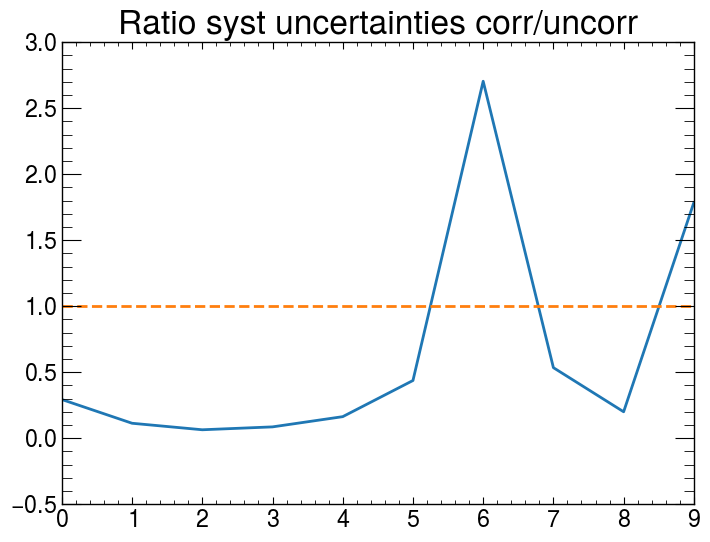

In [418]:
# plt.plot(uncorr_sys)
# plt.plot(corr_sys)
plt.title('Ratio syst uncertainties corr/uncorr')
plt.plot(np.divide(np.array(corr_sys), np.array(uncorr_sys)))
plt.plot(np.ones(len(corr_sys)), '--')
# plt.ylim(0,2)

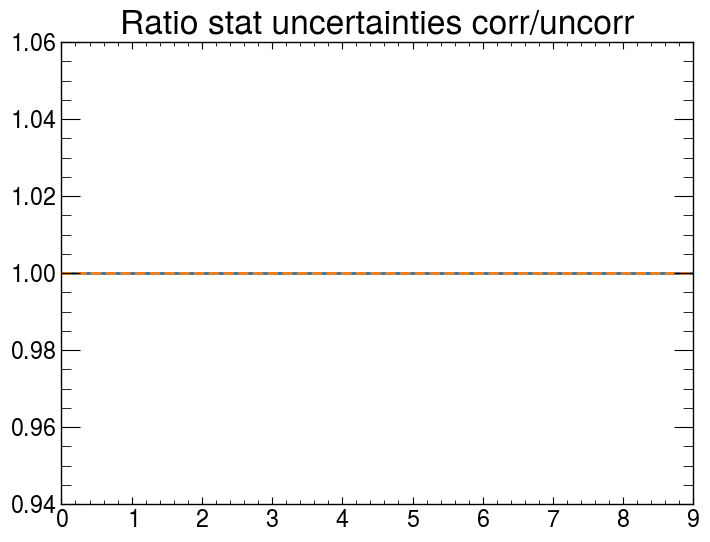

In [419]:
# plt.plot(uncorr_sys)
# plt.plot(corr_sys)
plt.title('Ratio stat uncertainties corr/uncorr')
plt.plot(np.divide(np.array(corr_stat), np.array(uncorr_stat)))
plt.plot(np.ones(len(corr_sys)), '--')
# plt.ylim(0,2)

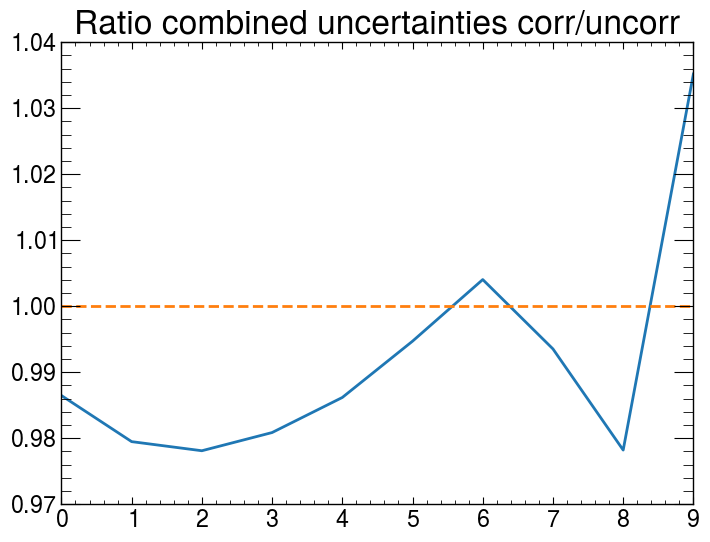

In [420]:
plt.title('Ratio combined uncertainties corr/uncorr')
plt.plot(np.divide(np.array(corr_sys) + np.array(corr_stat), np.array(uncorr_sys) + np.array(uncorr_stat)))
plt.plot(np.ones(len(corr_sys)), '--')

In [407]:
corr_sys

[442.17926018148773,
 308.07687332464985,
 234.32216969431016,
 350.54724562295627,
 594.1087511582971,
 910.551283042238,
 1268.6629090573729,
 1211.9891885438526,
 642.7390907914909,
 6439.725367296222]

In [377]:
corr_stat

[90358.46925609907,
 137580.85261856992,
 188944.52350790988,
 233404.23130681296,
 259560.5698652369,
 259487.7705155471,
 233442.909814481,
 189069.87018336367,
 138504.95357163955,
 91509.48377183867]

In [378]:
uncorr_sys

[1763.7165119633578,
 3258.6831864011797,
 4526.035558938387,
 4991.838105867365,
 4362.5835323653055,
 2469.8295837683386,
 552.9660885902857,
 2667.9333018539605,
 3879.95760171377,
 4294.315967874817]

In [343]:
c2     = ROOT.TCanvas("c2", "c2", 500, 500)
ratio  = unfolding_op_corr.Clone("Ratio")

ratio.SetTitle("Unfolded corr / Unfolded uncorr")

ratio.Divide(unfolding_unc_stat_corr)

ratio.Draw('e1')
#closure.SetMaximum(1.1)

# legclosure = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
# legclosure.SetBorderSize(0)
# legclosure.SetFillColor(0)
# legclosure.AddEntry(ratio , "True / Unfolded, All Unc.", 'p')
# legclosure.Draw()
c2.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
